In [1]:
## Clustering - Hierarchical Cluster Analysis
%cd "C:\Users\jwill\Documents\Machine Learning\Data"

C:\Users\jwill\Documents\Machine Learning\Data


In [2]:
# Example 1: wholesale customer segmentation problem
# https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
# Normalize the data
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


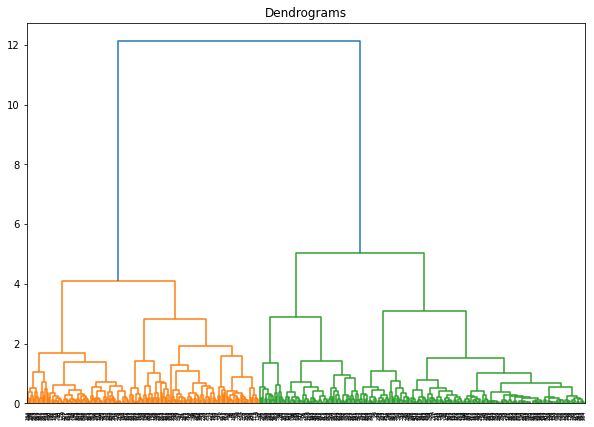

In [11]:
# Plot the dendrogram (takes a while)
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

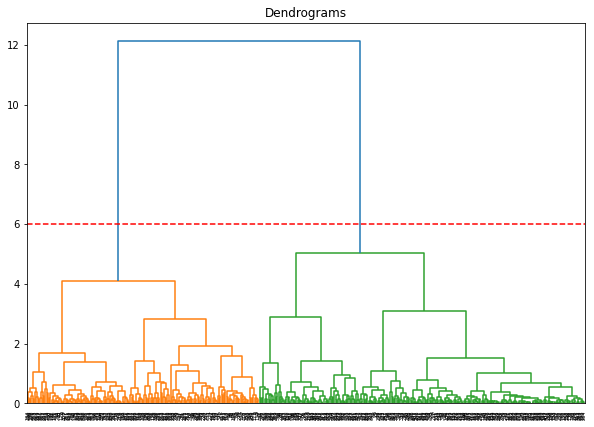

In [13]:
# Add a line at 6 (take a while)
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [14]:
# create array of which of two clusters
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

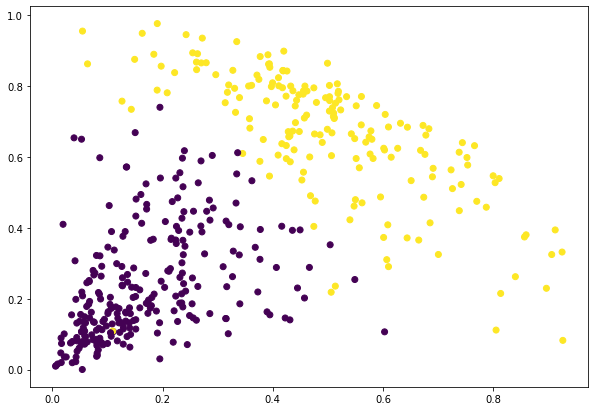

In [15]:
# scatterplot of clusters
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_) 

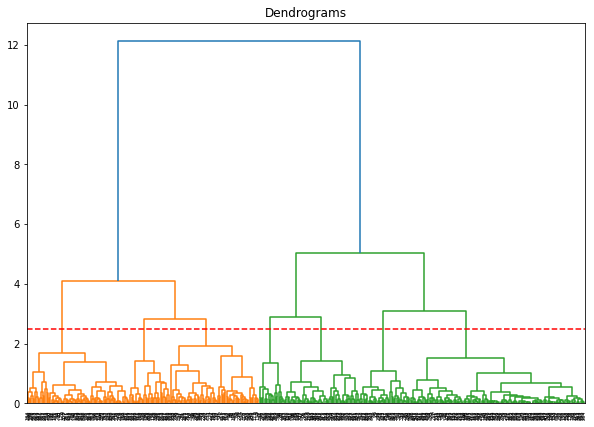

In [16]:
# Add a line at 2.5 for 7 clusters (take a while)
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=2.5, color='r', linestyle='--')

In [18]:
# create array of the 7 clusters
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([0, 0, 0, 3, 2, 0, 4, 0, 0, 1, 1, 2, 4, 4, 4, 2, 1, 0, 4, 4, 2, 3,
       2, 0, 4, 4, 2, 2, 1, 2, 4, 6, 2, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 1,
       0, 6, 1, 0, 0, 1, 3, 0, 2, 1, 2, 0, 1, 0, 2, 0, 4, 0, 0, 0, 3, 1,
       1, 4, 6, 2, 3, 4, 5, 3, 0, 2, 5, 0, 2, 0, 2, 1, 0, 2, 4, 1, 6, 2,
       5, 2, 2, 3, 0, 5, 0, 1, 1, 5, 5, 3, 0, 1, 0, 2, 2, 2, 1, 0, 6, 1,
       2, 0, 3, 2, 2, 2, 2, 0, 2, 3, 2, 3, 2, 0, 2, 2, 3, 4, 6, 2, 3, 2,
       2, 2, 2, 2, 6, 6, 2, 0, 2, 2, 2, 3, 2, 0, 2, 2, 3, 2, 2, 6, 2, 6,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0, 2, 3, 1, 6, 1, 1, 1, 1,
       2, 4, 4, 6, 4, 2, 1, 0, 1, 3, 5, 1, 0, 6, 3, 2, 2, 1, 2, 3, 3, 1,
       3, 2, 1, 1, 4, 1, 1, 1, 2, 0, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2, 1, 3,
       2, 0, 5, 5, 2, 2, 4, 3, 0, 3, 3, 6, 2, 6, 2, 6, 2, 2, 2, 2, 3, 2,
       2, 4, 0, 1, 2, 2, 2, 3, 3, 1, 3, 4, 6, 2, 4, 3, 2, 2, 2, 3, 2, 1,
       1, 6, 1, 2, 0, 2, 5, 6, 6, 2, 0, 6, 2, 5, 3, 4, 0, 4, 2, 3, 2, 2,
       2, 3, 2, 2, 0, 3, 1, 0, 2, 4, 2, 4, 0, 1, 4,

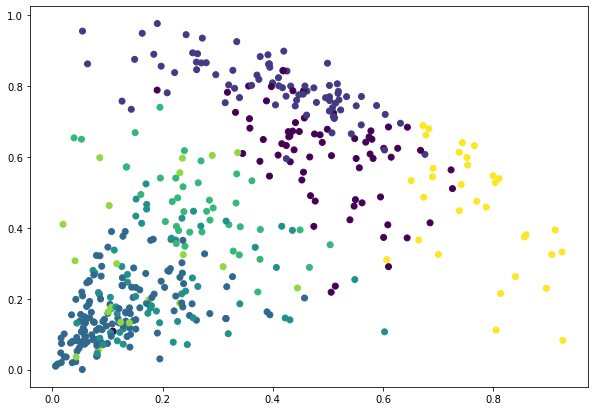

In [19]:
# scatterplot of 7 clusters
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_) 

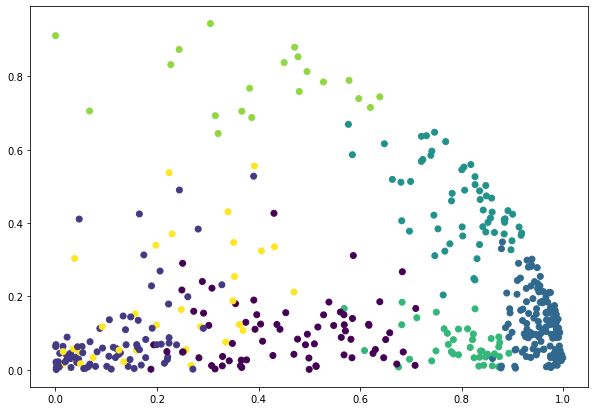

In [20]:
# scatterplot of 7 clusters
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Fresh'], data_scaled['Frozen'], c=cluster.labels_) 